Saving Part I.xlsx to Part I (5).xlsx
Loaded: Part I (5).xlsx (26, 6)
        Date  HSI Close price  HSI 2508 settle price  HIS 2508 OI  \
0 2025-08-01         24507.81                24450.0     128143.0   
1 2025-08-04         24733.45                24714.0     123223.0   
2 2025-08-05         24902.53                24844.0     120160.0   
3 2025-08-06         24910.63                24833.0     119720.0   
4 2025-08-07         25081.63                25032.0     118340.0   

   HSI 2509 settle price  HIS 2509 OI  
0                  24383         7143  
1                  24643         7238  
2                  24774         7826  
3                  24765         7977  
4                  24964         8222  

短月期指表格（Aug 1 - Sep 5, 2025）：
         Date  Short-dated settle  Short-dated OI
0  2025-08-01             24450.0        128143.0
1  2025-08-04             24714.0        123223.0
2  2025-08-05             24844.0        120160.0
3  2025-08-06             24833.0        1197

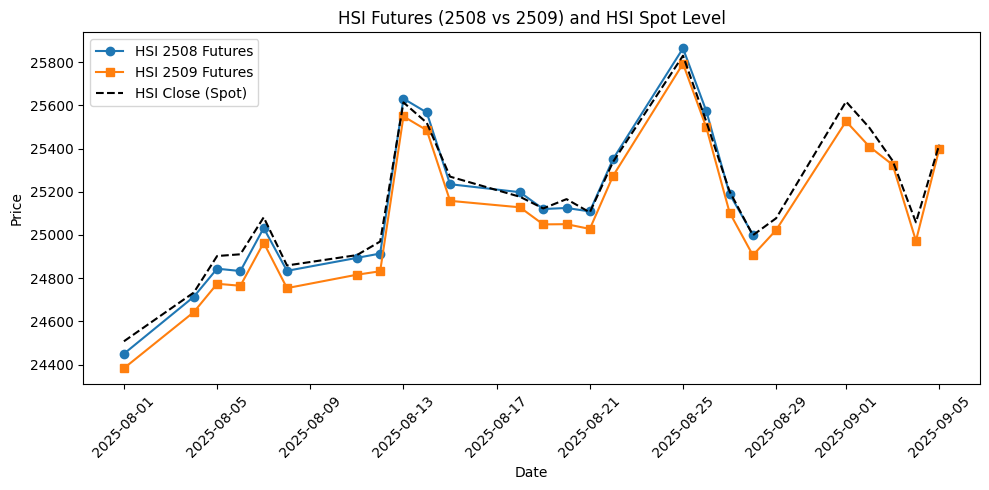

In [1]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = next(iter(uploaded))

if filename.lower().endswith((".xlsx", ".xls")):
    data = pd.read_excel(io.BytesIO(uploaded[filename]), sheet_name=0, engine="openpyxl")
else:
    data = pd.read_csv(io.BytesIO(uploaded[filename]))

data.columns = data.columns.str.strip()

print("Loaded:", filename, data.shape)
print(data.head())

filtered = data[(data["Date"] >= "2025-08-01") & (data["Date"] <= "2025-09-05")].copy()

filtered["Short-dated settle"] = filtered.apply(
    lambda row: row["HSI 2508 settle price"] if row["Date"] <= pd.to_datetime("2025-08-28") else row["HSI 2509 settle price"],
    axis=1
)
filtered["Short-dated OI"] = filtered.apply(
    lambda row: row["HIS 2508 OI"] if row["Date"] <= pd.to_datetime("2025-08-28") else row["HIS 2509 OI"],
    axis=1
)

short_dated = filtered[["Date", "Short-dated settle", "Short-dated OI"]].reset_index(drop=True)
print("\n短月期指表格（Aug 1 - Sep 5, 2025）：")
print(short_dated)


plt.figure(figsize=(10, 5))
plt.plot(filtered["Date"], filtered["HSI 2508 settle price"], label="HSI 2508 Futures", marker="o")
plt.plot(filtered["Date"], filtered["HSI 2509 settle price"], label="HSI 2509 Futures", marker="s")
plt.plot(filtered["Date"], filtered["HSI Close price"], label="HSI Close (Spot)", linestyle="--", color="black")

plt.title("HSI Futures (2508 vs 2509) and HSI Spot Level")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
